In [218]:
import pandas as pd

data = pd.read_excel("cluster.xlsx", sheet_name=None)
data

{'IS':    NP    RHINO  Cluster-L  Cluster-F  Cluster-P
 0   4  410.210    347.310    687.735    808.095
 1   8  251.940    212.315    365.305    455.260
 2  16  185.965    135.235    218.620    274.635
 3  32  122.145     85.680    150.535    171.445
 4  64   92.310     63.155    107.440    111.350,
 'LU':    NP   RHINO  Cluster-L  Cluster-F  Cluster-P
 0   4  277.86     224.97     344.58     483.80
 1   8  152.63     120.98     221.82     266.76
 2  16   90.51      67.34     129.46     145.60
 3  32   69.18      42.39      69.63      91.31
 4  64   41.04      35.74      40.65      50.28,
 'FT':    NP   RHINO  Cluster-L  Cluster-F  Cluster-P
 0   4  346.57     262.50     497.42     631.82
 1   8  187.04     149.73     281.90     380.61
 2  16  113.16      80.65     174.16     253.68
 3  32   99.19      54.74      97.86     144.79
 4  64   50.61      30.66      57.82      77.28,
 'LAMMPS':    NP  RHINO  Cluster-L  Cluster-F  Cluster-P
 0   4    384        352        452        602
 1   

In [219]:
def calculate_percentage_difference(df):
    h_percentage = ((df["Cluster-L"] - df["RHINO"]) / df["Cluster-L"]) * 100
    f_percentage = ((df["Cluster-F"] - df["RHINO"]) / df["Cluster-F"]) * 100
    p_percentage = ((df["Cluster-P"] - df["RHINO"]) / df["Cluster-P"]) * 100

    return pd.DataFrame({
        "NP": df["NP"],
        "Low-load": h_percentage,
        "Full-load": f_percentage,
        "Peak-load": p_percentage
    })

perf = {key: calculate_percentage_difference(df) for key, df in data.items()}
perf

{'IS':    NP   Low-load  Full-load  Peak-load
 0   4 -18.110622  40.353479  49.237404
 1   8 -18.663307  31.032972  44.660194
 2  16 -37.512478  14.936877  32.286489
 3  32 -42.559524  18.859401  28.755578
 4  64 -46.164199  14.082278  17.099237,
 'LU':    NP   Low-load  Full-load  Peak-load
 0   4 -23.509801  19.362702  42.567177
 1   8 -26.161349  31.191957  42.783776
 2  16 -34.407484  30.086513  37.836538
 3  32 -63.198868   0.646273  24.236119
 4  64 -14.829323  -0.959410  18.377088,
 'FT':    NP   Low-load  Full-load  Peak-load
 0   4 -32.026667  30.326485  45.147352
 1   8 -24.918186  33.650231  50.857833
 2  16 -40.309981  35.025264  55.392621
 3  32 -81.202046  -1.359084  31.493888
 4  64 -65.068493  12.469734  34.510870,
 'LAMMPS':    NP   Low-load  Full-load  Peak-load
 0   4  -9.090909  15.044248  36.212625
 1   8 -23.204420  16.165414  43.686869
 2  16 -29.347826   7.751938  38.659794
 3  32 -13.043478   3.703704  24.271845
 4  64 -25.714286  -2.325581  24.137931,
 'WRF': 

In [220]:
dfs = {key: pd.DataFrame(value) for key, value in perf.items()}

# 计算每个键对应的每一列的平均值
averages = {key: df.mean() for key, df in dfs.items()}

# 打印结果
for key, avg in averages.items():
    print(f"Average values for {key}:")
    print(avg)
    print()

Average values for IS:
NP           24.800000
Low-load    -32.602026
Full-load    23.853002
Peak-load    34.407780
dtype: float64

Average values for LU:
NP           24.800000
Low-load    -32.421365
Full-load    16.065607
Peak-load    33.160140
dtype: float64

Average values for FT:
NP           24.800000
Low-load    -48.705075
Full-load    22.022526
Peak-load    43.480513
dtype: float64

Average values for LAMMPS:
NP           24.800000
Low-load    -20.080184
Full-load     8.067944
Peak-load    33.393813
dtype: float64

Average values for WRF:
NP            7.500000
Low-load    -25.931621
Full-load    12.649738
Peak-load    36.550471
dtype: float64



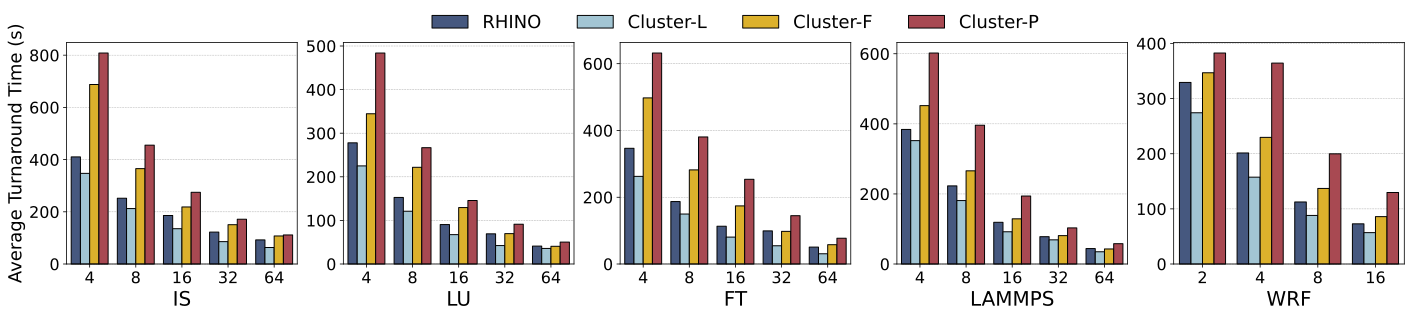

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

custom_palette = ['#3D5488', '#9AC9DB', '#F9C00F', '#B83945'] 
fig, axes = plt.subplots(1, 5, figsize=(24, 4))

sns.barplot(data=data["IS"].melt(id_vars="NP", var_name="Method", value_name="Value"),
                 x="NP", y="Value", hue="Method", palette=custom_palette , ax=axes[0], edgecolor='black')

sns.barplot(data=data["LU"].melt(id_vars="NP", var_name="Method", value_name="Value"),
                 x="NP", y="Value", hue="Method", palette=custom_palette, ax=axes[1], edgecolor='black' )

sns.barplot(data=data["FT"].melt(id_vars="NP", var_name="Method", value_name="Value"),
                 x="NP", y="Value", hue="Method", palette=custom_palette, ax=axes[2], edgecolor='black' )

sns.barplot(data=data["LAMMPS"].melt(id_vars="NP", var_name="Method", value_name="Value"),
                 x="NP", y="Value", hue="Method", palette=custom_palette, ax=axes[3], edgecolor='black')

sns.barplot(data=data["WRF"].melt(id_vars="NP", var_name="Method", value_name="Value"),
                 x="NP", y="Value", hue="Method", palette=custom_palette, ax=axes[4], edgecolor='black' )


axes[0].set_ylabel("Average Turnaround Time (s)", fontsize=18)
axes[0].set_xlabel("IS", fontsize=20)
axes[0].legend().set_visible(False)

axes[1].set_ylabel("")
axes[1].set_xlabel("LU", fontsize=20)
axes[1].legend().set_visible(False)

axes[2].set_ylabel("")
axes[2].set_xlabel("FT", fontsize=20)
axes[2].legend().set_visible(False)

axes[3].set_ylabel("")
axes[3].set_xlabel("LAMMPS", fontsize=20)
axes[3].legend().set_visible(False)

axes[4].set_ylabel("")
axes[4].set_xlabel("WRF", fontsize=20)
axes[4].legend().set_visible(False)



for ax in axes:
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5) 

plt.legend(loc="upper center", bbox_to_anchor=(-1.9, 1.2), ncol=4, fontsize=18, frameon=False)

plt.savefig("perf.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [222]:
data = pd.read_excel("cost.xlsx", sheet_name=None)
data

{'IS':    NP    RHINO  Cluster-L  Cluster-F  Cluster-Max
 0   4  410.210    347.310    687.735    1655.1200
 1   8  251.940    212.315    365.305     831.9800
 2  16  185.965    135.235    218.620     543.7773
 3  32  122.145     85.680    150.535     315.4350
 4  64   92.310     63.155    107.440     259.4200,
 'LU':    NP   RHINO  Cluster-L  Cluster-F  Cluster-Max
 0   4  277.86     224.97     344.58       995.16
 1   8  152.63     120.98     221.82       612.64
 2  16   90.51      67.34     129.46       320.03
 3  32   69.18      42.39      69.63       205.14
 4  64   41.04      35.74      40.65       126.12,
 'FT':    NP   RHINO  Cluster-L  Cluster-F  Cluster-Max
 0   4  346.57     262.50     497.42     1019.130
 1   8  187.04     149.73     281.90      660.100
 2  16  113.16      80.65     174.16      352.408
 3  32   99.19      54.74      97.86      220.360
 4  64   50.61      30.66      57.82       99.470,
 'LAMMPS':    NP  RHINO  Cluster-L  Cluster-F  Cluster-Max
 0   4    384 

In [223]:
import pandas as pd
import numpy as np

# Define the pricing variables
vcpu_price_per_hour = 0.04048
memory_price_per_hour = 0.004445

cluster_instance_price_per_hour = 2.304
cluster_instance_count = 4
cluster_instance_cpu = 48
cluster_instance_memory = 96

# Define the calculation functions
def calculate_rhino_price(np, makespan, factor):
    vcpu_hours = np * makespan / 3600
    memory_hours = (np * 2) * makespan / 3600
    price = (vcpu_hours * vcpu_price_per_hour + memory_hours * memory_price_per_hour) * (cluster_instance_count * cluster_instance_cpu * factor / np)
    return price

def calculate_cluster_price(makespan):
    total_hours = makespan / 3600
    price = total_hours * cluster_instance_price_per_hour * cluster_instance_count
    return price

# Function to calculate prices for a given dataset
def calculate_prices(data):
    rhino_h_prices = [calculate_rhino_price(np, makespan, 0.5) for np, makespan in zip(data["NP"], data["RHINO"])]
    rhino_f_prices = [calculate_rhino_price(np, makespan, 1) for np, makespan in zip(data["NP"], data["RHINO"])]
    rhino_p_prices = [calculate_rhino_price(np, makespan, 1.5) for np, makespan in zip(data["NP"], data["RHINO"])]

    cluster_h_prices = [calculate_cluster_price(makespan) for makespan in data["Cluster-L"]]
    cluster_f_prices = [calculate_cluster_price(makespan) for makespan in data["Cluster-F"]]
    cluster_p_prices = [calculate_cluster_price(makespan) for makespan in data["Cluster-Max"]]

    return pd.DataFrame({
        "NP": data["NP"],
        "RHINO_H_Price": rhino_h_prices,
        "RHINO_F_Price": rhino_f_prices,
        "RHINO_P_Price": rhino_p_prices,
        "Cluster_H_Price": cluster_h_prices,
        "Cluster_F_Price": cluster_f_prices,
        "Cluster_P_Price": cluster_p_prices
    })


# Calculate and store the results
cost = {key: calculate_prices(data) for key, data in data.items()}

cost


{'IS':    NP  RHINO_H_Price  RHINO_F_Price  RHINO_P_Price  Cluster_H_Price  \
 0   4       0.540055       1.080110       1.620165         0.889114   
 1   8       0.331687       0.663375       0.995062         0.543526   
 2  16       0.244829       0.489658       0.734487         0.346202   
 3  32       0.160808       0.321616       0.482424         0.219341   
 4  64       0.121529       0.243058       0.364588         0.161677   
 
    Cluster_F_Price  Cluster_P_Price  
 0         1.760602         4.237107  
 1         0.935181         2.129869  
 2         0.559667         1.392070  
 3         0.385370         0.807514  
 4         0.275046         0.664115  ,
 'LU':    NP  RHINO_H_Price  RHINO_F_Price  RHINO_P_Price  Cluster_H_Price  \
 0   4       0.365812       0.731624       1.097436         0.575923   
 1   8       0.200942       0.401885       0.602827         0.309709   
 2  16       0.119159       0.238319       0.357478         0.172390   
 3  32       0.091078       0.1

In [224]:
def calculate_percentage_difference(df):
    h_percentage = ((df["Cluster_H_Price"] - df["RHINO_H_Price"]) / df["Cluster_H_Price"]) * 100
    f_percentage = ((df["Cluster_F_Price"] - df["RHINO_F_Price"]) / df["Cluster_F_Price"]) * 100
    p_percentage = ((df["Cluster_P_Price"] - df["RHINO_P_Price"]) / df["Cluster_P_Price"]) * 100

    return pd.DataFrame({
        "NP": df["NP"],
        "Low-load": h_percentage,
        "Full-load": f_percentage,
        "Peak-load": p_percentage
    })

per = {key: calculate_percentage_difference(df) for key, df in cost.items()}
per

{'IS':    NP   Low-load  Full-load  Peak-load
 0   4  39.259152  38.651068  61.762463
 1   8  38.974922  29.064539  53.280586
 2  16  29.281343  12.509033  47.237752
 3  32  26.685795  16.543514  40.258109
 4  64  24.832015  11.630044  45.101757,
 'LU':    NP   Low-load  Full-load  Peak-load
 0   4  36.482512  17.061180  56.922919
 1   8  35.118898  29.228061  61.563158
 2  16  30.878151  28.091066  56.366603
 3  32  16.071582  -2.189448  47.971254
 4  64  40.946628  -3.840959  49.796206,
 'FT':    NP   Low-load  Full-load  Peak-load
 0   4  32.102536  28.337886  47.534414
 1   8  35.758220  31.756498  56.284252
 2  16  27.842669  33.170777  50.459506
 3  32   6.813073  -4.252042  30.553834
 4  64  15.110088   9.971474  21.502221,
 'LAMMPS':    NP   Low-load  Full-load  Peak-load
 0   4  43.897727  12.619469  41.974535
 1   8  36.639560  13.772635  52.281943
 2  16  33.480186   5.119025  57.987486
 3  32  41.865036   0.955247  52.808088
 4  64  35.348810  -5.246124  32.788366,
 'WRF': 

In [225]:
dfs = {key: pd.DataFrame(value) for key, value in per.items()}

# 计算每个键对应的每一列的平均值
averages = {key: df.mean() for key, df in dfs.items()}

# 打印结果
for key, avg in averages.items():
    print(f"Average values for {key}:")
    print(avg)
    print()

Average values for IS:
NP           24.800000
Low-load     31.806646
Full-load    21.679639
Peak-load    49.528134
dtype: float64

Average values for LU:
NP           24.800000
Low-load     31.899554
Full-load    13.669980
Peak-load    54.524028
dtype: float64

Average values for FT:
NP           24.800000
Low-load     23.525317
Full-load    19.796919
Peak-load    41.266846
dtype: float64

Average values for LAMMPS:
NP           24.800000
Low-load     38.246264
Full-load     5.444050
Peak-load    47.568084
dtype: float64

Average values for WRF:
NP            7.500000
Low-load     35.237040
Full-load    10.156616
Peak-load    34.308846
dtype: float64



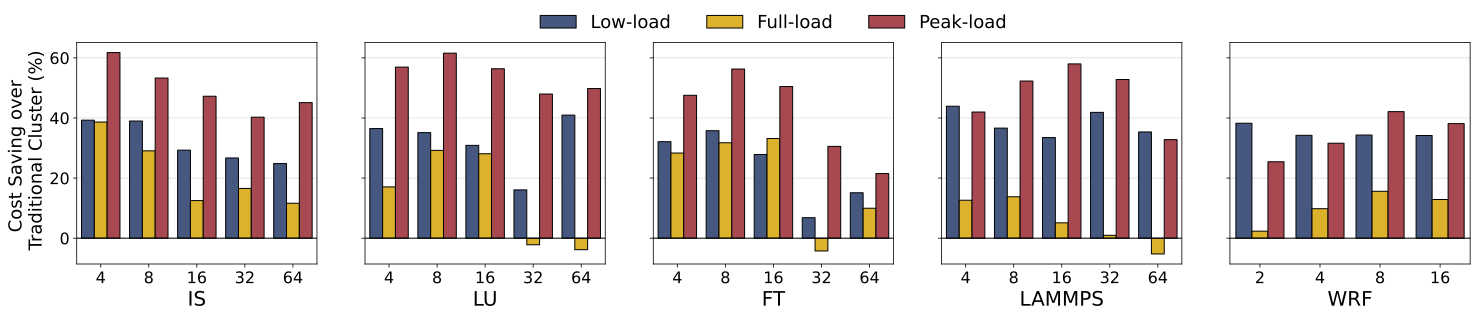

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

# 配色方案
palette = ['#3D5488', '#F9C00F', '#B83945'] 


# 创建子图
f, axes = plt.subplots(1, 5, figsize=(25, 4), sharey=True)

# 使用seaborn绘制每个实验的数据
for i, (key, df) in enumerate(per.items()):
    df_long = pd.melt(df, id_vars=['NP'], value_vars=['Low-load', 'Full-load', 'Peak-load'],
                      var_name='Load Type', value_name='Cost Saving (%)')
    sns.barplot(data=df_long, x='NP', y='Cost Saving (%)', hue='Load Type', ax=axes[i], palette=palette, edgecolor='black')
    axes[i].set_xlabel(f'{key}', fontsize=20)
    if i == 0:
        axes[i].set_ylabel('Cost Saving over \n Traditional Cluster (%)', fontsize=18)
    else:
        axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].legend().set_visible(False)
    axes[i].set_axisbelow(True)
    axes[i].yaxis.grid(True, linestyle='--', linewidth=0.5)
    axes[i].axhline(0, color='black', linewidth=1)

plt.legend(loc="upper center", bbox_to_anchor=(-1.9, 1.2), ncol=4, fontsize=18, frameon=False)

# 调整布局
plt.savefig("cost.pdf", format='pdf', bbox_inches='tight')
plt.show()


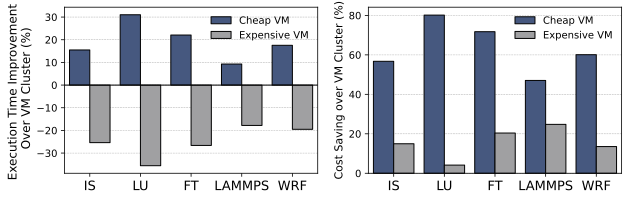

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

df1 = pd.read_excel("vm.xlsx", sheet_name="Sheet1")
df2 = pd.read_excel("vm.xlsx", sheet_name="Sheet2")


palette = ['#3D5488', '#a0a0a2'] 

plt.figure(figsize=(10, 3))

# Create the first subplot for performance improvement
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=df1.melt(id_vars="App", value_vars=["Cheap VM", "Expensive VM"], 
                         var_name="VM Family", value_name="Execution Time"), 
            x="App", y="Execution Time", hue="VM Family", edgecolor='black', palette=palette)
ax1.legend(fontsize=10, frameon=False)
ax1.set_xlabel('')
ax1.set_ylabel('Execution Time Improvement \n Over VM Cluster (%)', fontsize=12)
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5)

# Adding zero baseline
ax1.axhline(0, color='black', linewidth=1)
# Create the second subplot for cost improvement
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=df2.melt(id_vars="App", value_vars=["Cheap VM", "Expensive VM"], 
                         var_name="VM Family", value_name="Cost"), 
            x="App", y="Cost", hue="VM Family", edgecolor='black', palette = palette)


ax2.legend(fontsize=10, frameon=False)
ax2.set_xlabel('')
ax2.set_ylabel('Cost Saving over VM Cluster (%)', fontsize=11)
ax2.tick_params(axis='x', labelsize=13)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.5)

plt.savefig("vm.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [228]:
df1["Cheap VM"].mean()

19.0834592

In [229]:
df1["Expensive VM"].mean()

-24.9698934

In [230]:
df2["Cheap VM"].mean()

63.155652399999994

In [231]:
df2["Expensive VM"].mean()

15.560449